In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
route_csv = 'C:/Users/Miguel Sanka/Desktop/crimen_nac_clean.csv'
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_crime = pd.read_csv(route_csv, encoding='latin1')

In [3]:
# Función para obtener el total de crimenes por mes de un año específico
def sum_per_month(year: int) -> pd.DataFrame:
    df_year = df_crime.query("Año == {}".format(year))[months].sum()
    df_year = pd.DataFrame({'Month number': range(1, 13), 'Crimes':df_year.values}, index=df_year.index)
    df_year.index.name = "Month"
    return df_year


In [29]:
def generate_plot(year: int, confidence: int) -> None: 
    df_20XX = sum_per_month(year)

    df= pd.DataFrame({'x': df_20XX['Month number'], 'y': df_20XX['Crimes']})

    # Plot the regression line with confidence interval
    title = f"Crime per month, Mexico {year}"
    plt.figure(figsize=(9, 6)) 
    sb.lmplot(x='x', y='y', data=df, ci=confidence, scatter_kws={'s': 50}, line_kws={'color': 'purple'}, aspect=2)  # ci is the confidence interval percentage
    # Add labels
    plt.title(title)
    plt.xlabel('Month number')
    plt.ylabel('Crimes')
    plt.legend(["Real data", "Regression line", f"Confidence interval ({confidence}%)"])
    plt.xticks(range(1,13))

    # Show the plot   
    plt.savefig('C:/Users/Miguel Sanka/Desktop/' + title + '.png')
    plt.show()


<Figure size 900x600 with 0 Axes>

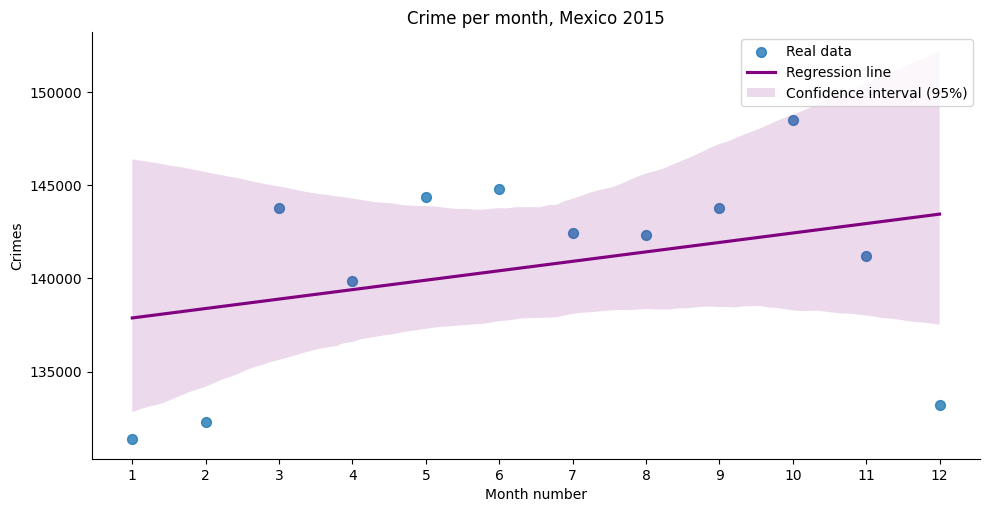

<Figure size 900x600 with 0 Axes>

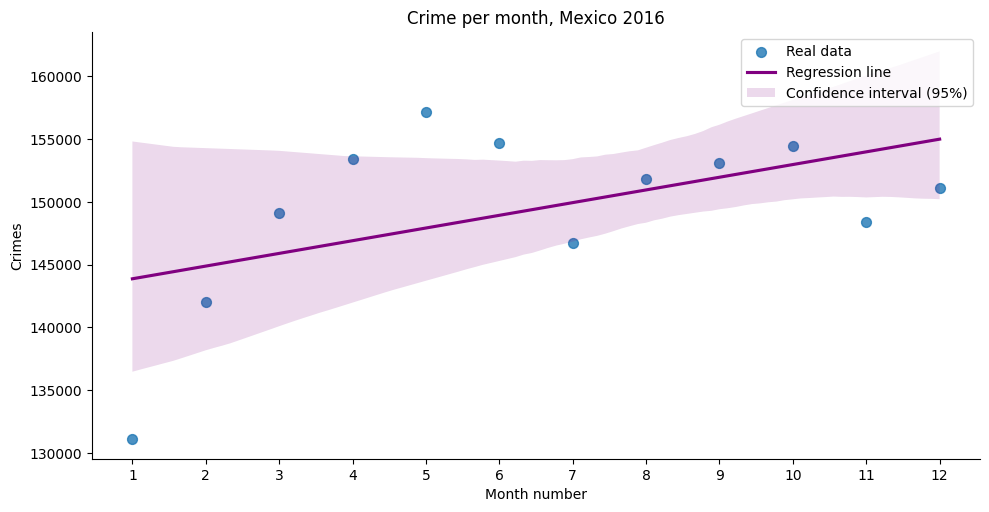

<Figure size 900x600 with 0 Axes>

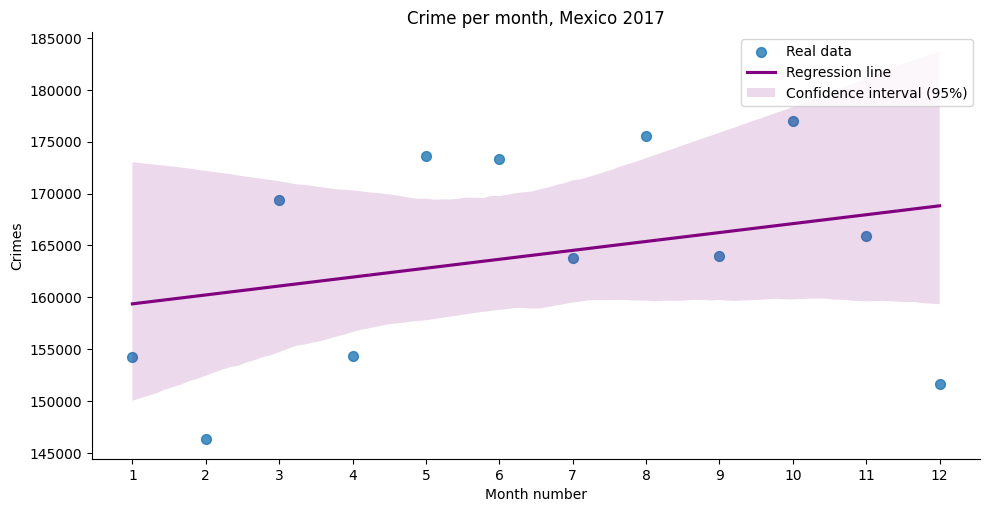

<Figure size 900x600 with 0 Axes>

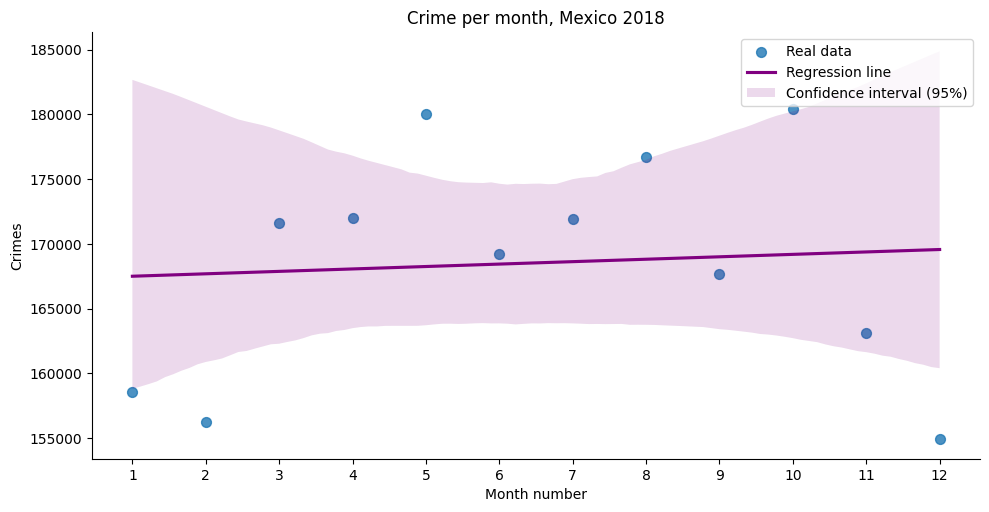

<Figure size 900x600 with 0 Axes>

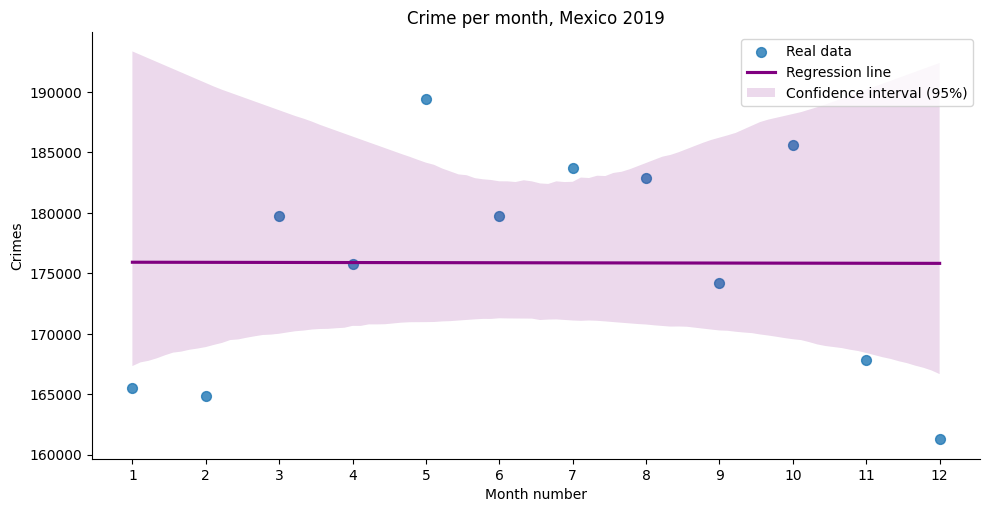

<Figure size 900x600 with 0 Axes>

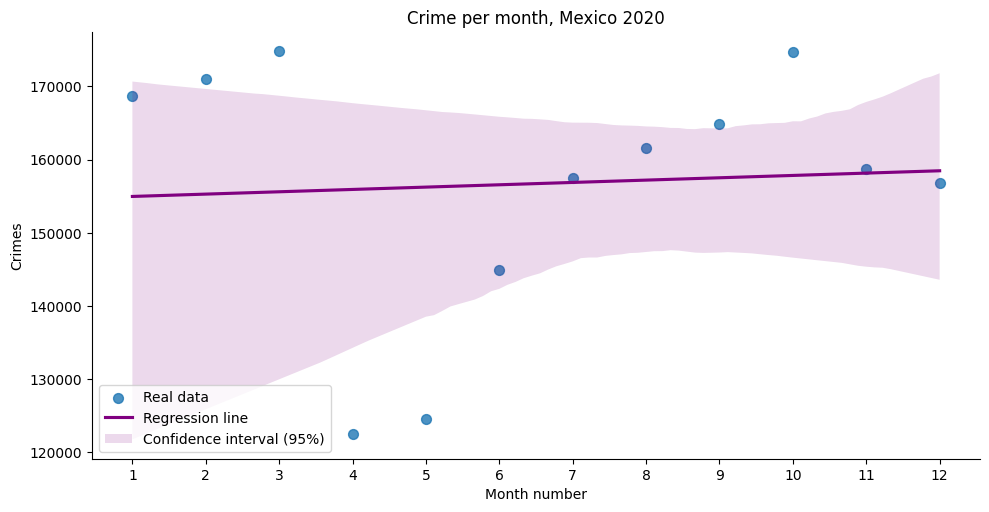

<Figure size 900x600 with 0 Axes>

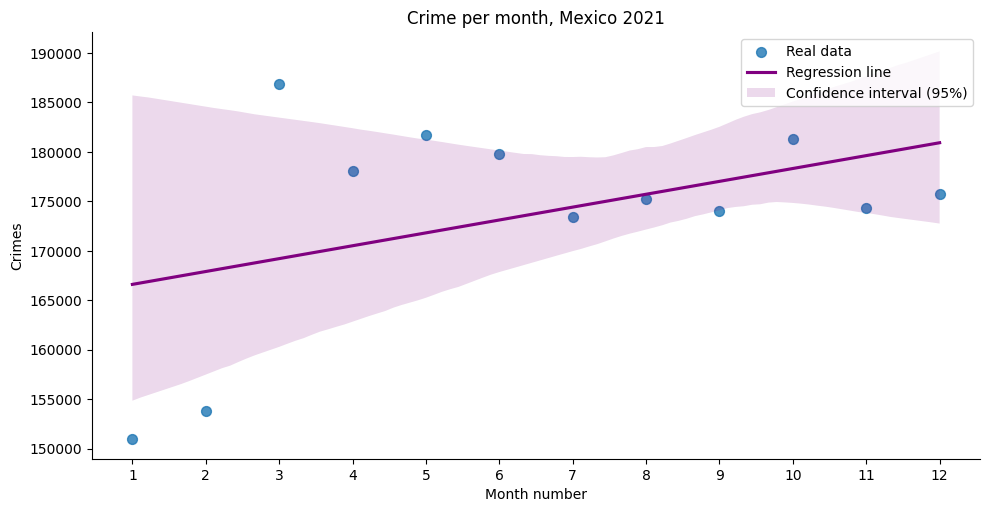

In [30]:
for _ in range(2015, 2022):
    generate_plot(_, 95)